In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r'C:\Users\user\Downloads\insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
df.duplicated().sum()

0

In [12]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [13]:
# convert smoker and sex into 0 and 1 
df['smoker'].replace({'yes': 1, 'no':0}, inplace=True)
df['sex'].replace({'male': 1, 'female': 0}, inplace=True)
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [15]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [16]:
df.select_dtypes(include='number').describe()

,age,sex,bmi,children,smoker,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


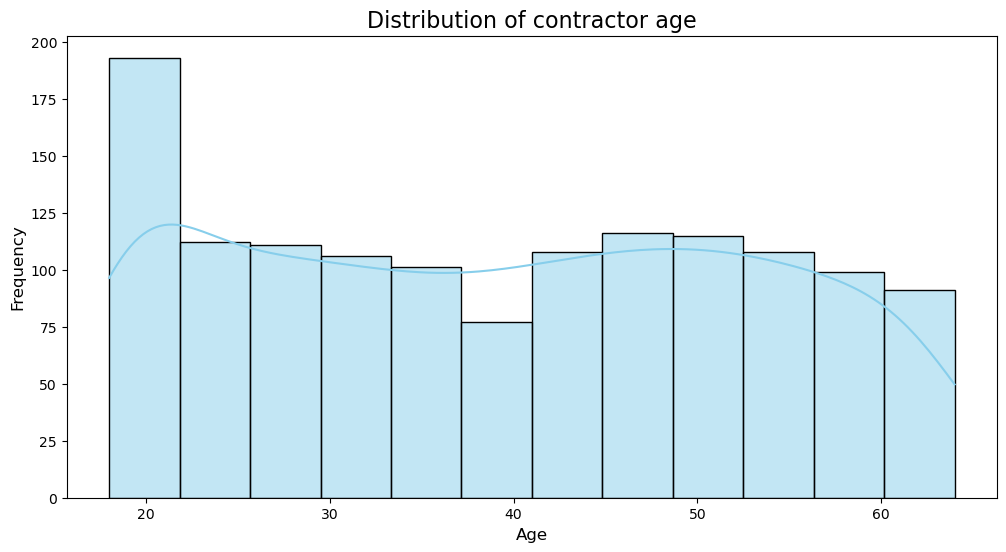

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x=df['age'], kde=True, color='skyblue')
plt.title('Distribution of contractor age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

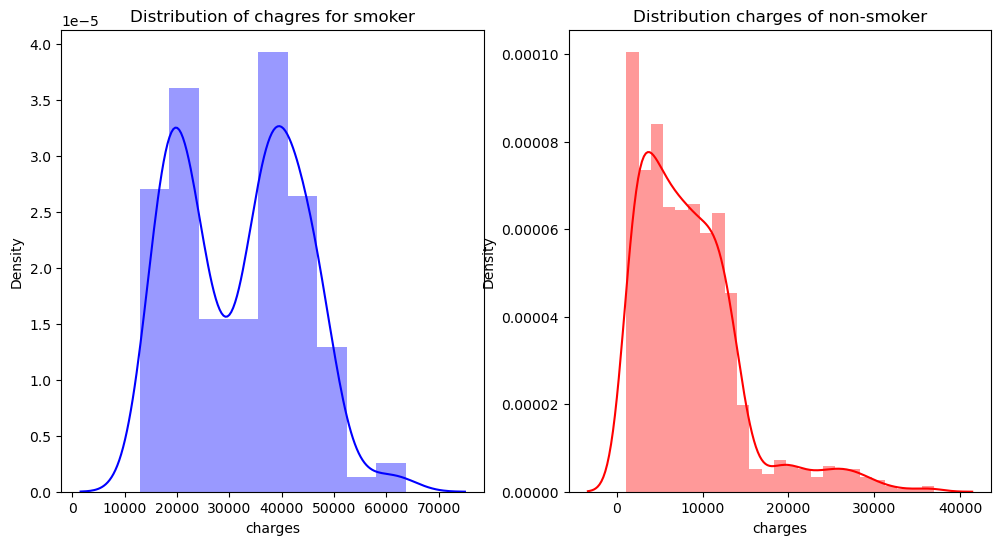

In [18]:
f = plt.figure(figsize=(12, 6))

ax = f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]['charges'], color='b', ax=ax)
plt.title('Distribution of chagres for smoker')

ax = f.add_subplot(122)
sns.distplot(df[(df.smoker ==0)]['charges'], color='r', ax=ax)
plt.title('Distribution charges of non-smoker')
plt.show()

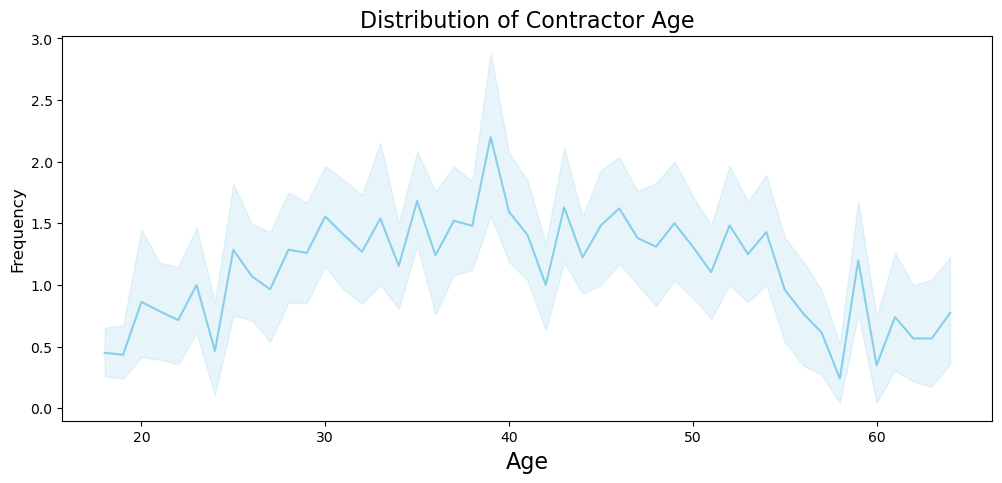

In [19]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x=df['age'], y=df['children'], color='skyblue')
plt.title('Distribution of Contractor Age', fontsize=16)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<Figure size 600x600 with 0 Axes>

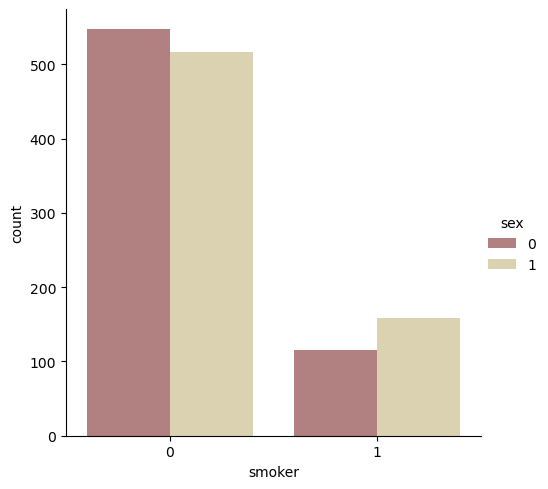

In [20]:

plt.figure(figsize=(6,6))
sns.catplot(x='smoker', kind='count', hue='sex', palette='pink', data=df)
plt.show()

Text(0.5, 1.0, 'Vilone distribution of Male Smoker')

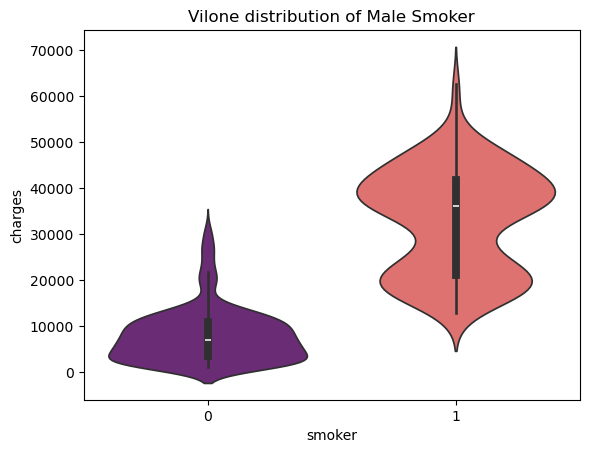

In [26]:

sns.violinplot(data=df[df['sex']==1],  x= df['smoker'], y='charges', palette='magma')
plt.title('Vilone distribution of Male Smoker')

Text(0.5, 1.0, 'Charges distribution of Female smoker and non-smoker')

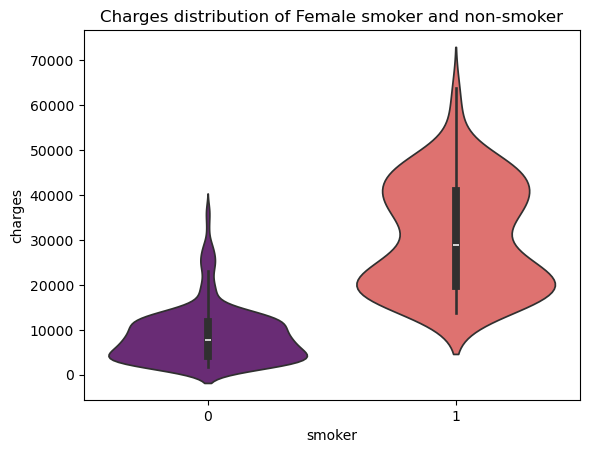

In [27]:
sns.violinplot(data=df[df['sex']==0], x = df['smoker'], y='charges', palette='magma')
plt.title('Charges distribution of Female smoker and non-smoker')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 115.9+ KB


In [35]:
df['charges'] = df['charges'].round()
df.groupby([df['sex'], df['smoker'], df['region']])['charges'].sum().reset_index()


,sex,smoker,region,charges
0,0,0,northeast,1272532.0
1,0,0,northwest,1186245.0
2,0,0,southeast,1173196.0
3,0,0,southwest,1161009.0
4,0,1,northeast,812930.0
5,0,1,northwest,860454.0
6,0,1,southeast,1189251.0
7,0,1,southwest,665448.0
8,1,0,northeast,1083002.0
9,1,0,northwest,1096693.0


In [36]:
df[df['age'] < 25]

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16885.0
1,18,1,33.770,1,0,southeast,1726.0
12,23,1,34.400,0,0,southwest,1827.0
15,19,1,24.600,1,0,southwest,1837.0
17,23,1,23.845,0,0,northeast,2395.0
...,...,...,...,...,...,...,...
1328,23,0,24.225,2,0,northeast,22396.0
1331,23,0,33.400,0,0,southwest,10796.0
1334,18,0,31.920,0,0,northeast,2206.0
1335,18,0,36.850,0,0,southeast,1630.0


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [40]:
label_encoder = LabelEncoder()

# fit and transform the data 
df['region'] = label_encoder.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16885.0
1,18,1,33.770,1,0,2,1726.0
2,28,1,33.000,3,0,2,4449.0
3,33,1,22.705,0,0,1,21984.0
4,32,1,28.880,0,0,1,3867.0


In [54]:
x = df.drop(['charges', 'region'], axis=1)
y = df.charges

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)


In [56]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [61]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [62]:
print(lr.score(x_test, y_test))

0.752380646457167
